### Student Information
Name: 吳宇文

Student ID:112011558

GitHub ID:Wuyuwin

Kaggle name:112011558_吳宇文

Kaggle private scoreboard snapshot:
[Snapshot](img/pic0.png)


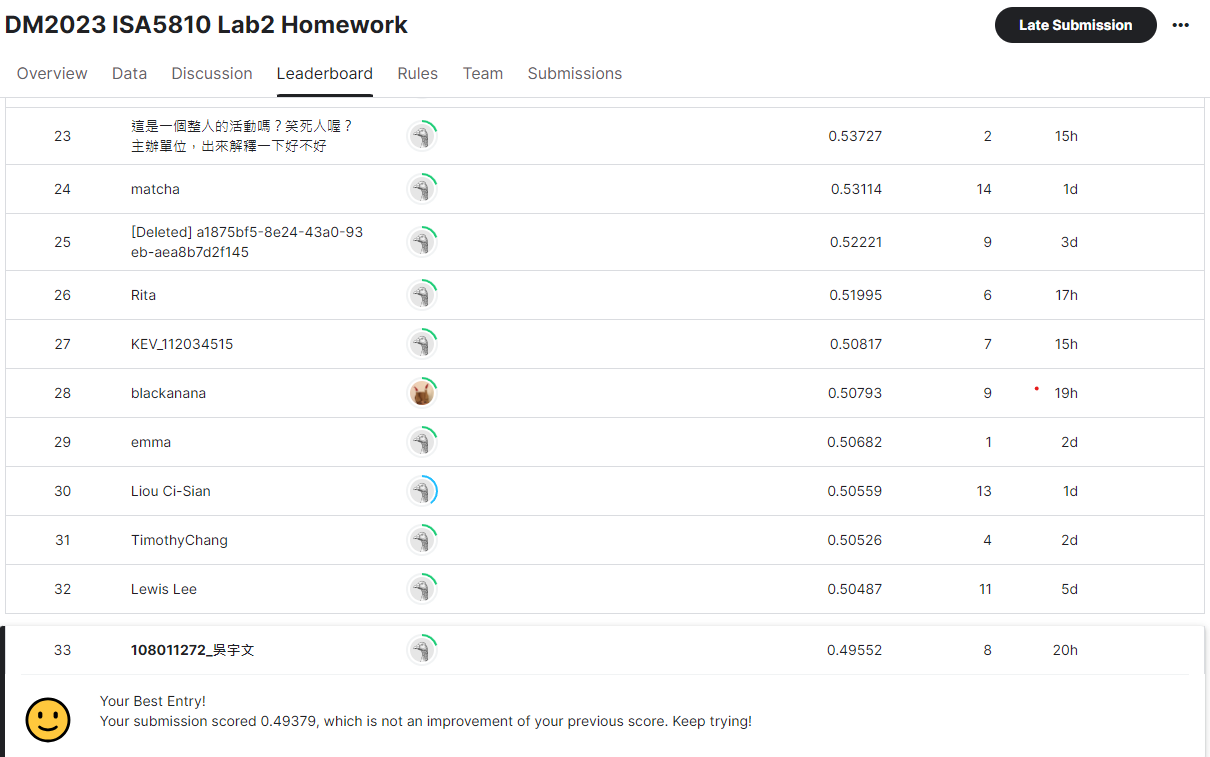

In [ ]:
from IPython.display import Image

# Specify the file name you uploaded
file_name = 'pic0.png'

# Display the image
Image(file_name)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

# FIRST PART


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


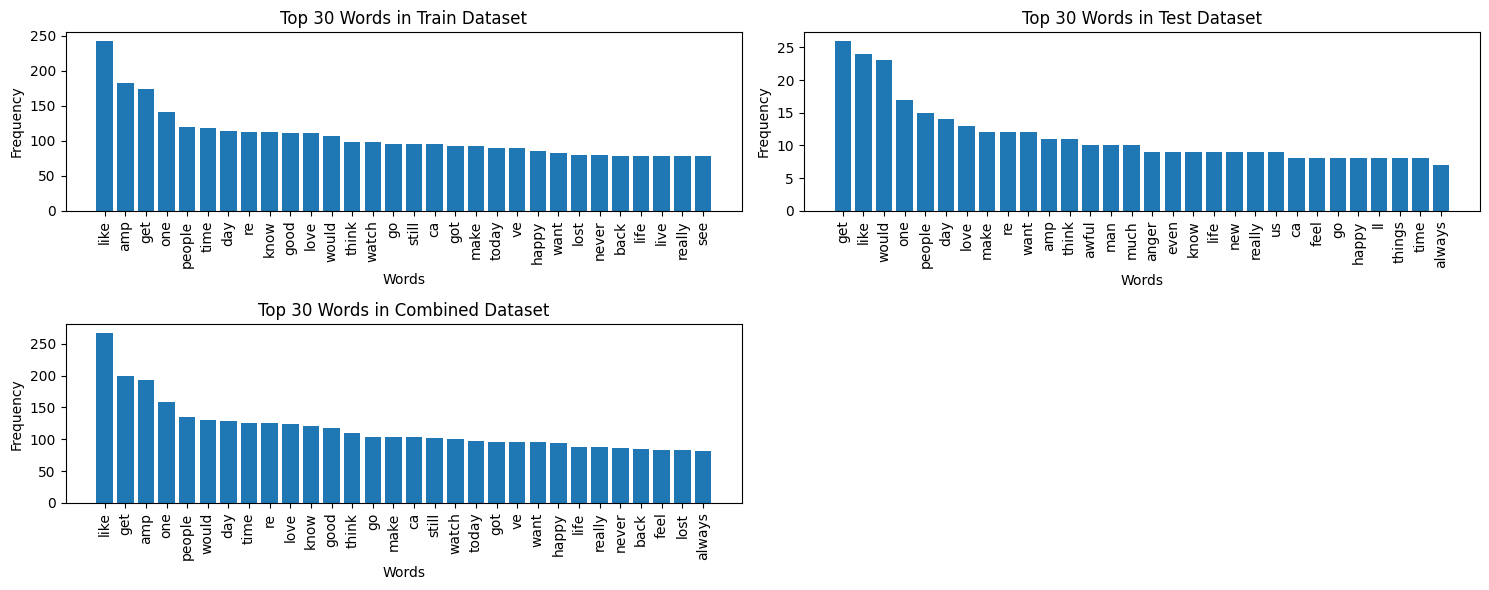

In [ ]:
# Tokenizing the train and test data
train_tokens = [' '.join(word_tokenize(sentence)) for sentence in train_df.text]
test_tokens = [' '.join(word_tokenize(sentence)) for sentence in test_df.text]

# Removing stopwords from train and test data
stop_words = set(stopwords.words('english'))
train_tokens = [' '.join([word for word in word_tokenize(sentence) if word.lower() not in stop_words]) for sentence in train_df.text]
test_tokens = [' '.join([word for word in word_tokenize(sentence) if word.lower() not in stop_words]) for sentence in test_df.text]
combined_tokens = train_tokens + test_tokens

# Initialize the CountVectorizer
count_vect = CountVectorizer()

# Fit and transform on train and test datasets
train_word_freq = count_vect.fit_transform(train_tokens)
test_word_freq = count_vect.transform(test_tokens)
combined_word_freq = count_vect.transform(combined_tokens)

# Get feature names (words)
feature_names = count_vect.get_feature_names_out()

# Calculate total frequencies of each word in the train and test datasets
train_word_freq = train_word_freq.toarray().sum(axis=0)
test_word_freq = test_word_freq.toarray().sum(axis=0)
combined_word_freq = combined_word_freq.toarray().sum(axis=0)

# Map word frequencies to their respective words
word_freq_train = {word: freq for word, freq in zip(feature_names, train_word_freq)}
word_freq_test = {word: freq for word, freq in zip(feature_names, test_word_freq)}
word_freq_combined = {word: freq for word, freq in zip(feature_names, combined_word_freq)}

# Select top 30 words for train and test datasets
top_30_train_words = dict(sorted(word_freq_train.items(), key=lambda item: item[1], reverse=True)[:30])
top_30_test_words = dict(sorted(word_freq_test.items(), key=lambda item: item[1], reverse=True)[:30])
top_30_combined_words = dict(sorted(word_freq_combined.items(), key=lambda item: item[1], reverse=True)[:30])

# Plotting word frequency distributions for train and test datasets
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.bar(range(len(top_30_train_words)), list(top_30_train_words.values()), align='center')
plt.xticks(range(len(top_30_train_words)), list(top_30_train_words.keys()), rotation='vertical')
plt.title('Top 30 Words in Train Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.bar(range(len(top_30_test_words)), list(top_30_test_words.values()), align='center')
plt.xticks(range(len(top_30_test_words)), list(top_30_test_words.keys()), rotation='vertical')
plt.title('Top 30 Words in Test Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.bar(range(len(top_30_combined_words)), list(top_30_combined_words.values()), align='center')
plt.xticks(range(len(top_30_combined_words)), list(top_30_combined_words.keys()), rotation='vertical')
plt.title('Top 30 Words in Combined Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = train_df['text']

# Create the TF-IDF vectorizer with 1000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display feature names for features 100 to 110
print("Feature names for features 100 to 110:")
print(feature_names[100:110])

# Display the TF-IDF matrix
print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())


Feature names for features 100 to 110:
['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']

TF-IDF Matrix:
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.1385259 0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

From the prsdicted label, we can know how many of them are correct judgment.For anger as an example,the model predicted that 55 of them are anger which are true anger, and 20 of them are predicted as anger but their true emotion are fear, and so on.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

# Create a Naive Bayes model
NB_model = MultinomialNB()

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# Training the model
NB_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))


              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Comparison**:

Both models have *similar* overall performance, with the Naive Bayes model having a slightly higher accuracy (0.70) compared to the Decision Tree model (0.68).
The precision, recall, and F1-score values for both models are close, indicating that they perform similarly across the different classes.

**Naive Bayes** is based on probability theory and assumes that features are conditionally independent given the class. It performs well when this assumption holds.

**Decision Tree**s, on the other hand, partition the feature space based on the most informative features at each split. They can capture more complex relationships but may be prone to overfitting.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

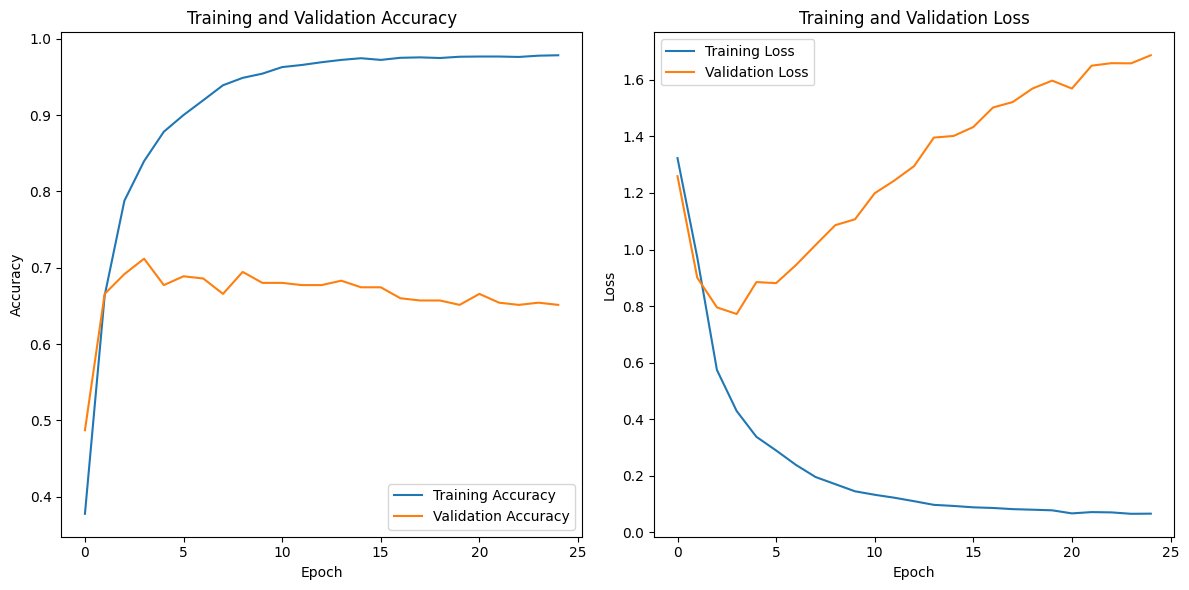

In [ ]:
# Answer here
import matplotlib.pyplot as plt

# Assuming you have a history object like this
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Training and Validation **Accuracy**:

Overfitting: Training accuracy continues to improve, but validation accuracy plateaus or starts to decrease.

Training and Validation **Loss**:

Overfitting: Training loss continues to decrease, but validation loss plateaus or starts to increase.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here

def average_word_vectors(sentence, word_vectors):
    # Tokenize the sentence into words
    words = sentence.split()

    # Get the word vectors for each word
    vectors = [word2vec_model.wv[word] for word in words]

    # Average the word vectors
    avg_vector = np.mean(vectors, axis=0)

    return avg_vector

# Example usage:
sentence = "i am a happy king"
sentence_vector = average_word_vectors(sentence, word2vec_model.wv)
sentence_vector

array([ 0.2648063 ,  0.06450504,  0.35656318, -0.10482965, -0.16620882,
       -1.0984104 ,  0.56303644,  1.1111823 , -0.61905503, -0.60375375,
       -0.38303664, -0.9173833 ,  0.03286713,  0.20426314,  0.19315077,
       -0.61495364,  0.487713  , -0.06984886, -0.11510905, -0.91962945,
        0.66624606,  0.38032678,  0.8090242 , -0.23674634, -0.35039812,
        0.44540057, -0.585519  ,  0.01922732, -0.30281785, -0.18421945,
        0.35763055,  0.08851657,  0.0494083 , -0.79464585,  0.03876321,
        0.65744483,  0.41715914, -0.46785083, -0.5179275 , -0.4947566 ,
        0.32556266, -0.7322322 ,  0.16489299,  0.6901823 ,  0.741911  ,
       -0.47825822, -0.37805897, -0.150098  ,  0.33441645, -0.31457546,
        0.31147668, -0.19873713,  0.36756745, -0.6384483 , -0.75868666,
        0.13654034,  0.13592145, -0.04553552, -0.15983325, -0.00965464,
        0.40543422, -0.06822705,  0.33837038,  0.4229378 , -0.27410254,
        0.8690797 ,  0.27130386,  0.89664423, -1.1410879 ,  0.69

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

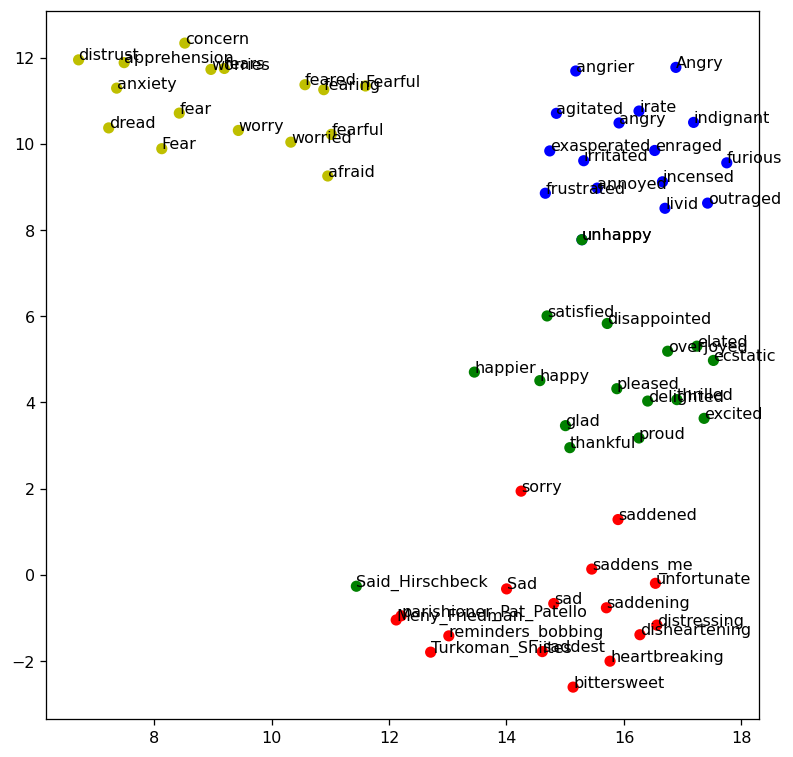

In [ ]:
# Answer here
word_list = ["angry", "happy", "sad", "fear"]
topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

target_words = angry_words + happy_words + sad_words + fear_words

cn = topn+1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(8, 8), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# SECOND PART

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import keras
from sklearn.feature_extraction.text import CountVectorizer

BOW_100000 = CountVectorizer(max_features=100000, tokenizer=nltk.word_tokenize)
BOW_100000.fit(train_df['text'])

X_train = BOW_100000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_100000.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# One-hot encode the 'emotion' column
encoder = OneHotEncoder(sparse=False)
y_train = train_df['emotion']
y_train = encoder.fit_transform(train_df[['emotion']])

# Display the one-hot encoded matrix
print("One-Hot Encoded Matrix:")
print(y_train.shape)
decoded_emotions = encoder.inverse_transform(y_train)
print("Decoded Emotions:")
print(decoded_emotions)
input_shape = X_train.shape[1]
print(input_shape)
output_shape = np.size(y_train,1)
print(output_shape)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
import xgboost as xgb

# input layer
model_input = Input(shape=(input_shape, ))  # 100000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=512)(X)
H1 = ReLU()(X_W1)
H1 = Dropout(0.5)(H1)  # Adding dropout with a rate of 0.5

# 2nd hidden layer
H1_W2 = Dense(units=256)(H1)
H2 = ReLU()(H1_W2)
H2 = Dropout(0.5)(H2)  # Adding dropout with a rate of 0.5

# output layer
H2_W3 = Dense(units=output_shape)(H2) # 8
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# training setting
epochs = 10
batch_size = 256

# ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# training
history = model.fit(X_train_split, y_train_split,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_split, y_val_split),callbacks=[checkpoint])

In [ ]:
from keras.models import load_model
best_model = load_model("best_model.h5")

pred_result = best_model.predict(X_test)
y_test = encoder.inverse_transform(pred_result)
for i,v in enumerate(y_test):
    test_df['emotion'].iloc[i] = v
output_df = test_df[['tweet_id', 'emotion']]
output_df = output_df.rename(columns={'tweet_id': 'id'})

output_df.to_csv('output_file.csv', index=False)

# THIRD PATH

**Maximum Word Count**:
Experimented with different maximum word counts (5000, 10000, 100000, 1000000).
Found that the maximum calculation time for 1,000,000 words is long, and the improvement is not substantial.
Opted for 100,000 words due to shorter calculation time and similar performance.

**Fully Connected Layer Design**:
Explored different configurations for fully connected layers, specifically dense units (256-256, 512-256, 1024-512).
Concluded that 256-256 is suitable for input with fewer character features, while 512-256 is more suitable for input with more features, balancing computational efficiency and model capacity.

**Optimization Algorithm**:
Compared the performance of two optimization algorithms: Adam and XGBoost.
Observed that XGBoost shows significant improvement when there are fewer input features.
As input features increase, the improvement becomes less obvious, but XGBoost introduces more complexity to the model.

**Epochs and Batch Size**:
Set a larger batch size due to the large dataset.
Chose a smaller number of epochs (10) since the model is relatively simple and doesn't require an extensive training duration.


Preprocessed text data for a bag-of-words representation, limiting the feature set to a maximum of 100,000 words.
Designed a model with varying dense units (512-256) and incorporated dropout (0.5) to prevent overfitting.

